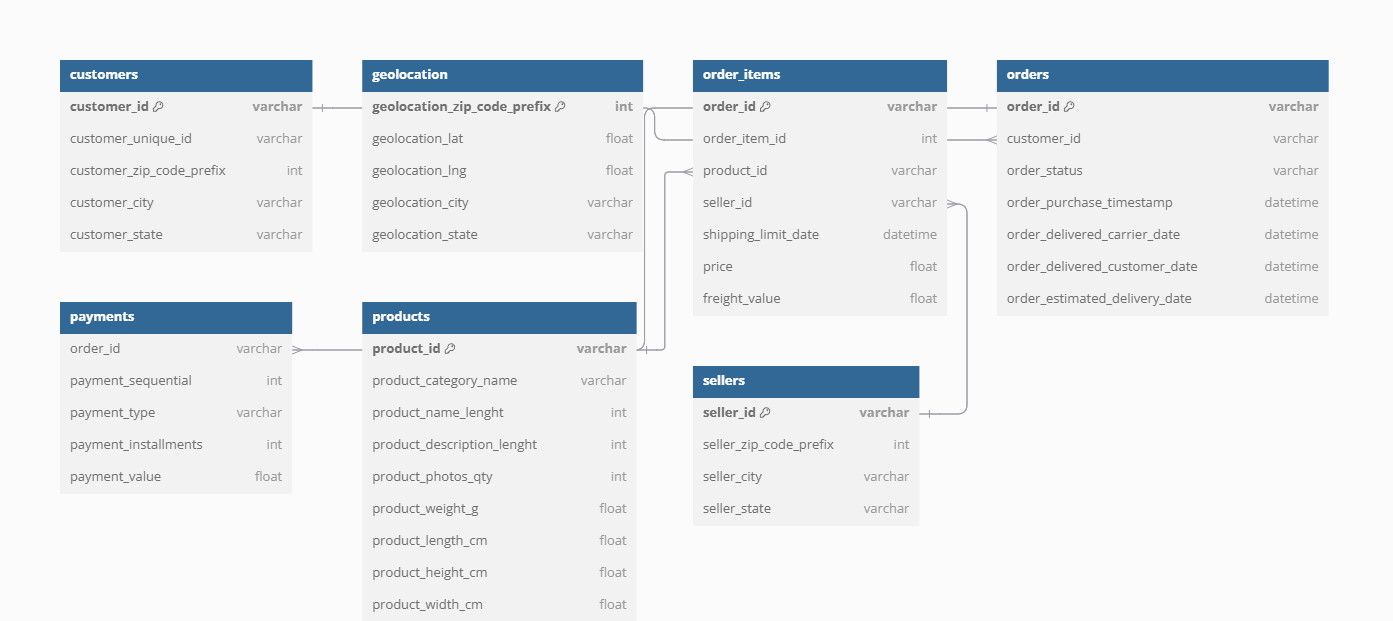

In [1]:
from IPython.display import Image
Image(filename="C:/Users/Acer/OneDrive/Зображення/ERD_e-Comm(target).png")

# **Seller Revenue and Geographic Performance**

*Goal: Identify top-performing sellers and potential geographic advantages*

 *🏪 Who are the top sellers by revenue and number of orders?*


In [26]:
## total revenue from product prices and total shipping costs (freight_value) grouped by product categories.

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connection to MySQL
conn = mysql.connector.connect(
    host='localhost',
    user='codebind',  
    password='58623',  
    database='mydb1'  
)


cursor = conn.cursor()

query = ''' SELECT 
    sellers.seller_id, 
    sellers.seller_state, 
    COUNT(orders.order_id) AS total_orders, 
    SUM(order_items.price) AS total_revenue 
FROM 
    order_items
JOIN 
    orders ON order_items.order_id = orders.order_id
JOIN 
    sellers ON order_items.seller_id = sellers.seller_id
GROUP BY 
    sellers.seller_id, sellers.seller_state
ORDER BY 
    total_revenue DESC
LIMIT 55;
'''


top_sellers_df = pd.read_sql(query, conn)
top_sellers_df



C:\Users\Acer\AppData\Local\Temp\ipykernel_11488\1883001999.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_sellers_df = pd.read_sql(query, conn)


,seller_id,seller_state,total_orders,total_revenue
0,4869f7a5dfa277a7dca6462dcf3b52b2,SP,2312,458945.256699
1,53243585a1d6dc2643021fd1853d8905,BA,820,445552.099091
2,4a3ca9315b744ce9f8e9374361493884,SP,3974,400945.842918
3,fa1c13f2614d7b5c4749cbc52fecda94,SP,1172,388084.058792
4,7c67e1448b00f6e969d365cea6b010ab,SP,2728,375847.783878
5,7e93a43ef30c4f03f38b393420bc753a,SP,680,352863.738663
6,da8622b14eb17ae2831f4ac5b9dab84a,SP,3102,320473.136177
7,7a67c85e85bb2ce8582c35f2203ad736,SP,2342,283491.063320
8,1025f0e2d44d7041d6cf58b6550e0bfa,SP,2856,277937.101074
9,955fee9216a65b617aa5c0531780ce60,SP,2998,270343.401394


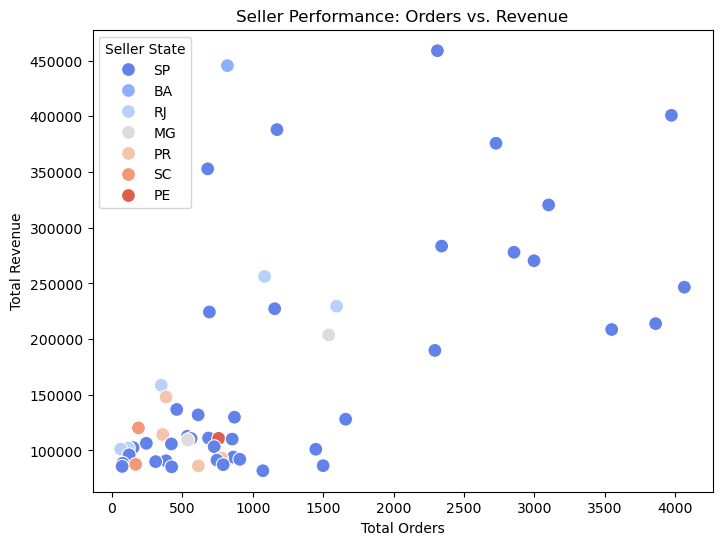

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=top_sellers_df,
    x="total_orders",
    y="total_revenue",
    hue="seller_state",
    palette="coolwarm",
    s=100
)
plt.xlabel("Total Orders")
plt.ylabel("Total Revenue")
plt.title("Seller Performance: Orders vs. Revenue")
plt.legend(title="Seller State")
plt.show()

